1. The "Messy Retail Audit"

Scenario: You receive a raw CSV dump from a legacy retail system. Columns have mixed types, 'null' text strings, and formatting errors.

Tasks:

Identify and unify 4 different types of missing value markers (e.g., n/a, -, ?, NaN).

Convert Date columns from object to datetime (handling mixed formats like DD-MM-YYYY and MM/DD/YYYY).

Clean the Price column (remove currency symbols $, € and convert to float).

Deduplicate rows based on TransactionID but keep the most recent entry.

Dataset: Sample Superstore Dataset (Note: You may need to manually introduce errors like NaN or bad formatting to practice cleaning, or use the "Dirty Data" practice sets on Kaggle).

Alternative: I can generate a Python script to create a "dirty" CSV for you if you choose this task.

In [1]:
# %pip install kagglehub

# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("bravehart101/sample-supermarket-dataset")

# print("Path to dataset files:", path)

In [2]:
src = '../datasets/bravehart101/sample-supermarket-dataset/versions/1'

In [3]:
import pandas as pd
df = pd.read_csv(src+"/SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 13)

In [5]:
df.size

129922

In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
df.describe(include='object')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


In [10]:
print("Ship Mode:", df["Ship Mode"].value_counts(),end="\n\n")
print("Segment:", df["Segment"].value_counts(),end="\n\n")
print("Country:", df["Country"].value_counts())

Ship Mode: Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

Segment: Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

Country: Country
United States    9994
Name: count, dtype: int64


In [11]:
print("Postal Code:", df["Postal Code"].value_counts())

Postal Code: Postal Code
10035    263
10024    230
10009    229
94122    203
10011    193
        ... 
61761      1
79605      1
72762      1
8401       1
95616      1
Name: count, Length: 631, dtype: int64


In [12]:
print("City:", df["City"].value_counts().keys())

City: Index(['New York City', 'Los Angeles', 'Philadelphia', 'San Francisco',
       'Seattle', 'Houston', 'Chicago', 'Columbus', 'San Diego', 'Springfield',
       ...
       'Waterloo', 'Goldsboro', 'Davis', 'Atlantic City', 'Normal', 'Abilene',
       'Montebello', 'Kissimmee', 'Danbury', 'Springdale'],
      dtype='object', name='City', length=531)


In [13]:
print("State:", df["State"].value_counts().keys())

State: Index(['California', 'New York', 'Texas', 'Pennsylvania', 'Washington',
       'Illinois', 'Ohio', 'Florida', 'Michigan', 'North Carolina', 'Arizona',
       'Virginia', 'Georgia', 'Tennessee', 'Colorado', 'Indiana', 'Kentucky',
       'Massachusetts', 'New Jersey', 'Oregon', 'Wisconsin', 'Maryland',
       'Delaware', 'Minnesota', 'Connecticut', 'Missouri', 'Oklahoma',
       'Alabama', 'Arkansas', 'Rhode Island', 'Utah', 'Mississippi',
       'South Carolina', 'Louisiana', 'Nevada', 'Nebraska', 'New Mexico',
       'Iowa', 'New Hampshire', 'Kansas', 'Idaho', 'Montana', 'South Dakota',
       'Vermont', 'District of Columbia', 'Maine', 'North Dakota',
       'West Virginia', 'Wyoming'],
      dtype='object', name='State')


In [14]:
print("Region:", df["Region"].value_counts(),end="\n\n")
print("Category:", df["Category"].value_counts())

Region: Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

Category: Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64


In [15]:
print("Sub-Category:", df["Sub-Category"].value_counts())

Sub-Category: Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64


In [16]:
print("City:", df["City"].nunique())

City: 531


In [17]:
df.duplicated().value_counts()

False    9977
True       17
Name: count, dtype: int64

In [18]:
df.drop_duplicates(inplace=True)
df.duplicated().value_counts()

False    9977
Name: count, dtype: int64

In [19]:
df.loc[df['Sales'] == df['Sales'].max()]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2697,Standard Class,Home Office,United States,Jacksonville,Florida,32216,South,Technology,Machines,22638.48,6,0.5,-1811.0784


In [20]:
df.loc[df['Sales'] == df['Sales'].min()]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
4101,Standard Class,Consumer,United States,Houston,Texas,77095,Central,Office Supplies,Appliances,0.444,1,0.8,-1.11


Original Row Count: 9977
Clean Row Count:    8810
Outliers Removed:   1167


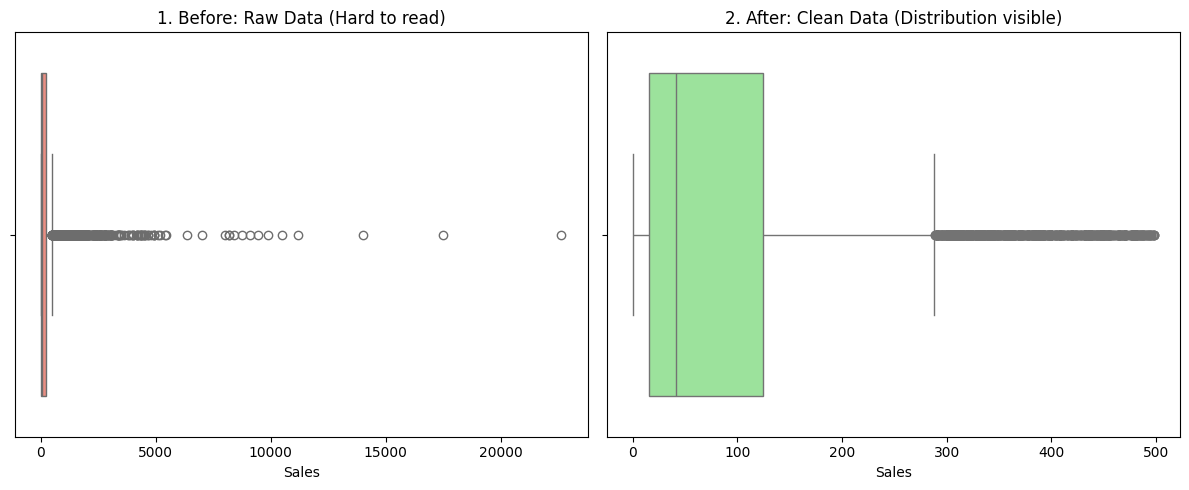

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# --- STEP 1: Visualize First ---
# We use a Boxplot because it is designed specifically to spot outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Sales'], color='salmon')
plt.title("1. Before: Raw Data (Hard to read)")

# --- STEP 2: Find & Remove ---
# We use the IQR (Interquartile Range) method to mathematically define an outlier
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove them
df_clean_sales = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

print(f"Original Row Count: {len(df)}")
print(f"Clean Row Count:    {len(df_clean_sales)}")
print(f"Outliers Removed:   {len(df) - len(df_clean_sales)}")
# --- STEP 3: Visualize Again ---
plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean_sales['Sales'], color='lightgreen')
plt.title("2. After: Clean Data (Distribution visible)")

plt.tight_layout()
plt.show()

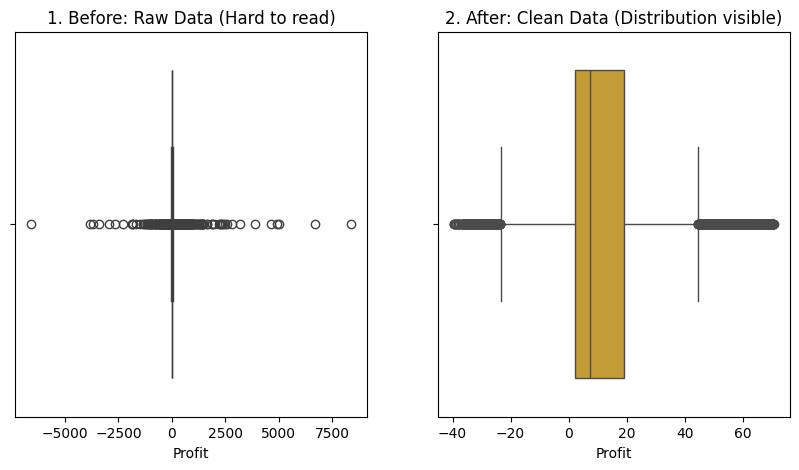

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax=plt.subplots(1,2,figsize=(10,5))
sns.boxplot(x=df['Profit'],ax=ax[0])
ax[0].set_title('1. Before: Raw Data (Hard to read)')
ax[0].set_xlabel('Profit')

Q1=df['Profit'].quantile(0.25)
Q3=df['Profit'].quantile(0.75)
IQR= Q3-Q1
lower_bound= Q1 - 1.5*IQR
upper_bound= Q3 + 1.5*IQR
df_clean_Profit= df[(df['Profit']>= lower_bound) & (df['Profit']<=upper_bound)]

sns.boxplot(x=df_clean_Profit['Profit'],ax=ax[1],color='goldenrod')
ax[1].set_title('2. After: Clean Data (Distribution visible)')
ax[1].set_xlabel('Profit')
plt.show()

In [23]:
df.describe(include='number')

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [24]:
df.describe(include='object')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9977,9977,9977,9977,9977,9977,9977,9977
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5955,5183,9977,914,1996,3193,6012,1522


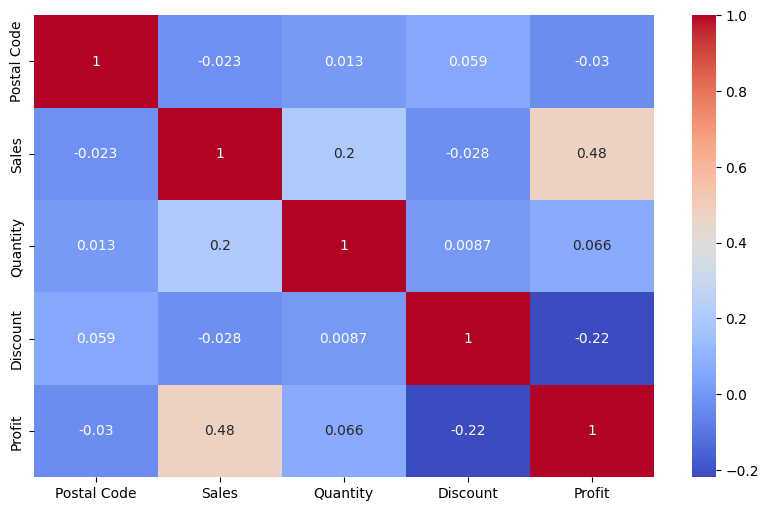

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


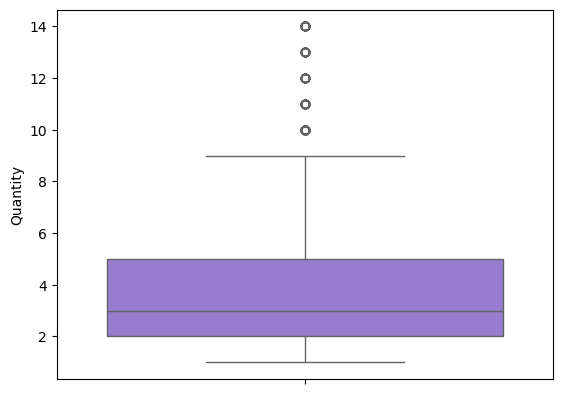

In [26]:
sns.boxplot(df['Quantity'],color='mediumpurple')
plt.show()

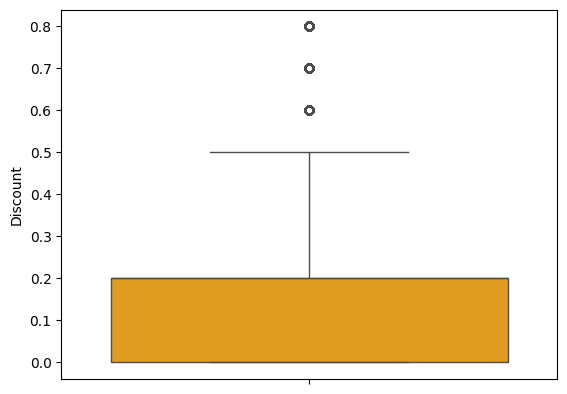

In [27]:
sns.boxplot(df['Discount'],color='orange')
plt.show()

In [28]:
total_sales=df["Sales"].sum()
total_profit=df["Profit"].sum()
total_quantity=df["Quantity"].sum()
total_discount=df["Discount"].sum()

In [29]:
df.head(0).dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [30]:
df["Ship Mode"].value_counts()

Ship Mode
Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: count, dtype: int64

In [31]:
df.describe(include='object')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9977,9977,9977,9977,9977,9977,9977,9977
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5955,5183,9977,914,1996,3193,6012,1522


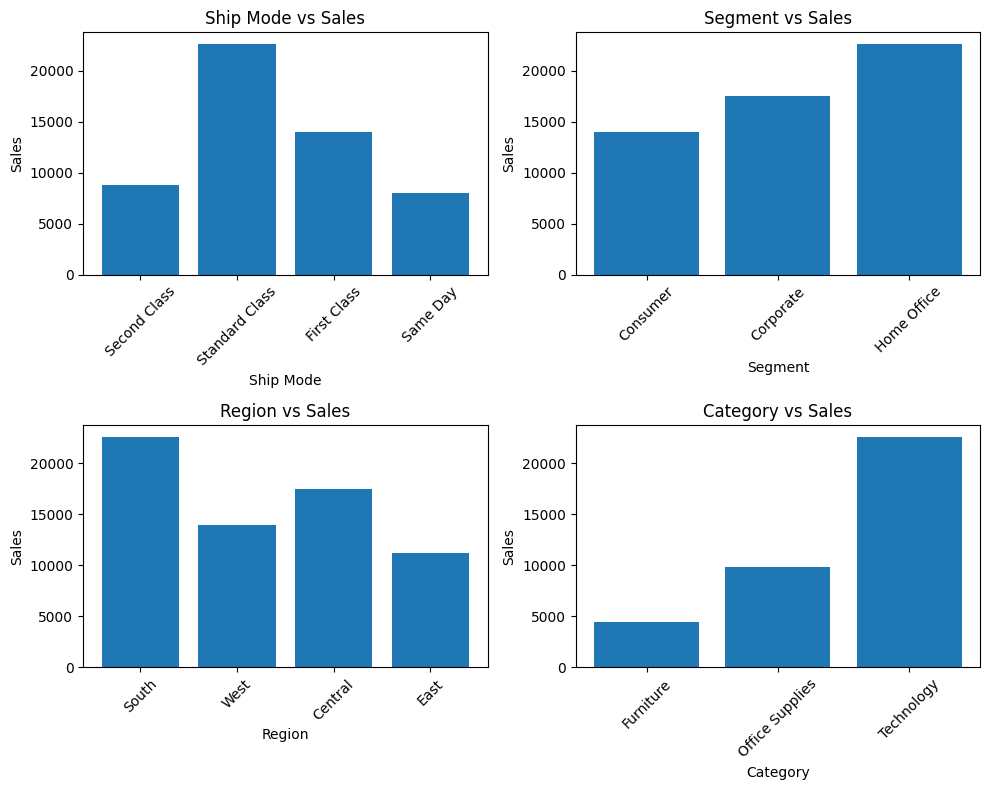

In [32]:
import matplotlib.pyplot as plt

# Create 4x2 subplots (8 panels total)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # Increased height for 4 rows

# Flatten axes for easier indexing (optional but cleaner)
axes = axes.ravel()
i=0
categorical_features = df[['Ship Mode', 'Segment', 'Region', 'Category']]

for feature in categorical_features.columns:
    bars=axes[i].bar(df[feature],df['Sales'])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Sales")
    axes[i].set_title(f"{feature} vs Sales")
    axes[i].tick_params(axis='x', rotation=45)
    i += 1

plt.tight_layout()
plt.show()


          Category       mean          sum  count
0        Furniture   8.697740   18421.8137   2118
1  Office Supplies  20.353403  122364.6608   6012
2       Technology  78.752002  145454.9481   1847


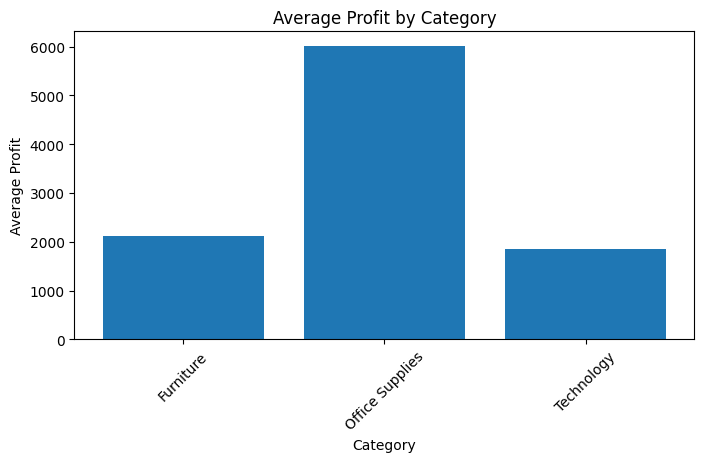

In [33]:
profit_summary = df.groupby('Category')['Profit'].agg(['mean', 'sum', 'count']).reset_index()
print(profit_summary)
plt.figure(figsize=(8,4))
plt.bar(profit_summary['Category'], profit_summary['count'])
plt.xlabel('Category')
plt.ylabel('Average Profit')
plt.title('Average Profit by Category')
plt.xticks(rotation=45)
plt.show()


In [34]:
# Sales and profit by Category
cat_perf = df.groupby('Category')[['Sales','Profit']].sum().sort_values('Profit', ascending=False)
print(cat_perf)

# Sales and profit by Segment
seg_perf = df.groupby('Segment')[['Sales','Profit']].sum().sort_values('Profit', ascending=False)
print(seg_perf)

# Sales and profit by Region
region_perf = df.groupby('Region')[['Sales','Profit']].sum().sort_values('Profit', ascending=False)
print(region_perf)

# Sales and profit by Sub-Category
subcat_perf = df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values('Profit', ascending=False)
print(subcat_perf.head(10))

                       Sales       Profit
Category                                 
Technology       836154.0330  145454.9481
Office Supplies  718735.2440  122364.6608
Furniture        741306.3133   18421.8137
                    Sales       Profit
Segment                               
Consumer     1.160833e+06  134007.4413
Corporate    7.060701e+05   91954.9798
Home Office  4.292927e+05   60279.0015
               Sales       Profit
Region                           
West     725255.6365  108329.8079
East     678435.1960   91506.3092
South    391721.9050   46749.4303
Central  500782.8528   39655.8752
                   Sales      Profit
Sub-Category                        
Copiers       149528.030  55617.8249
Phones        330007.054  44515.7306
Accessories   167380.318  41936.6357
Paper          78224.142  33944.2395
Binders       203409.169  30228.0003
Chairs        327777.761  26567.1278
Storage       223843.608  21278.8264
Appliances    107532.161  18138.0054
Furnishings    91683.

In [35]:
df.describe(include='object')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9977,9977,9977,9977,9977,9977,9977,9977
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5955,5183,9977,914,1996,3193,6012,1522


In [36]:
categorical_features=df.describe(include='object').columns.drop(['City','State',"Sub-Category",'Country'])
print(categorical_features)

Index(['Ship Mode', 'Segment', 'Region', 'Category'], dtype='object')


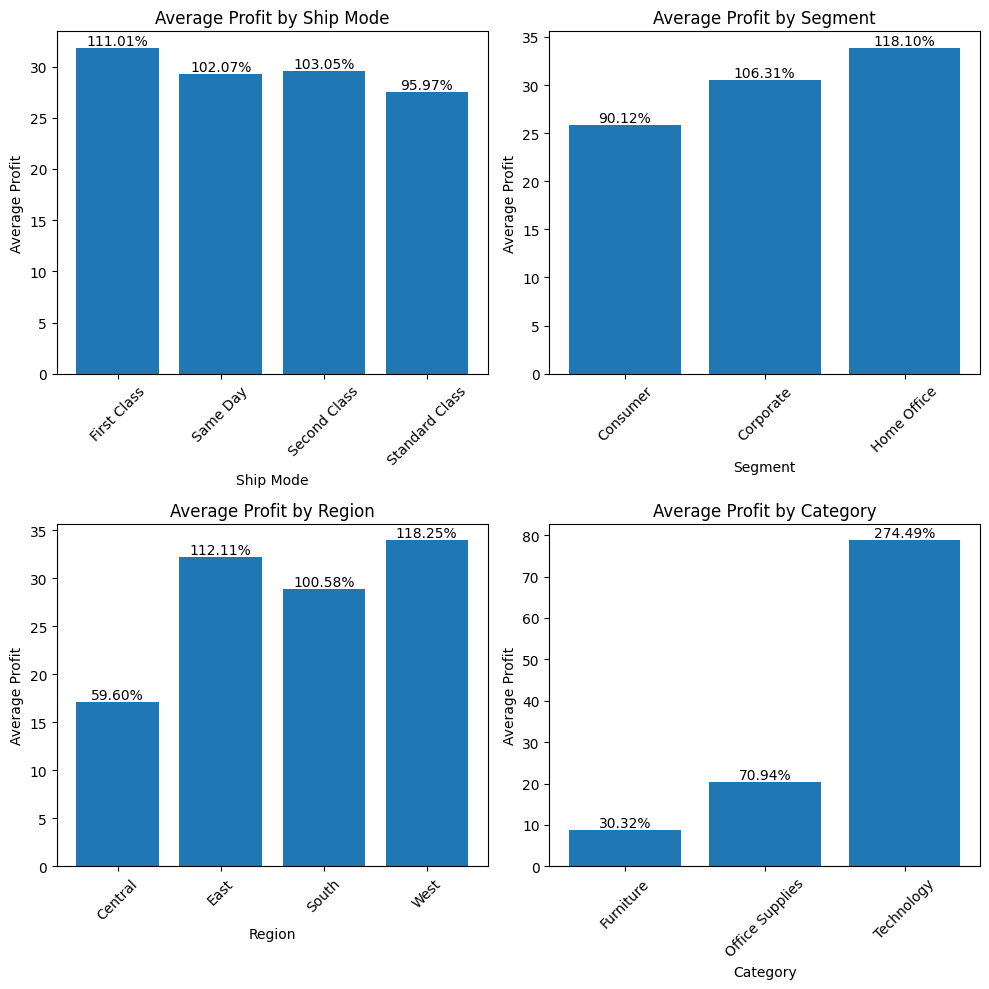

In [37]:
import math
i=0
fig,ax=plt.subplots(math.ceil(len((categorical_features))/2),2,figsize=(10,10))
ax = ax.ravel()

for feature in categorical_features:
    prof_summary = df.groupby(feature)['Profit'].agg(['mean','sum','count']).reset_index()
    bars=ax[i].bar(prof_summary[f'{feature}'],prof_summary['mean'])
    ax[i].set_xlabel(feature)
    ax[i].set_ylabel('Average Profit')
    ax[i].set_title(f'Average Profit by {feature}')
    ax[i].tick_params(axis='x',rotation=45)
    
    for bar in bars:
        ax[i].text(bar.get_x()+bar.get_width()/2,bar.get_height(),f'{(bar.get_height()/df.Profit.mean())*100:.2f}%',ha='center',va='bottom')
    i+=1

plt.tight_layout()
plt.show()



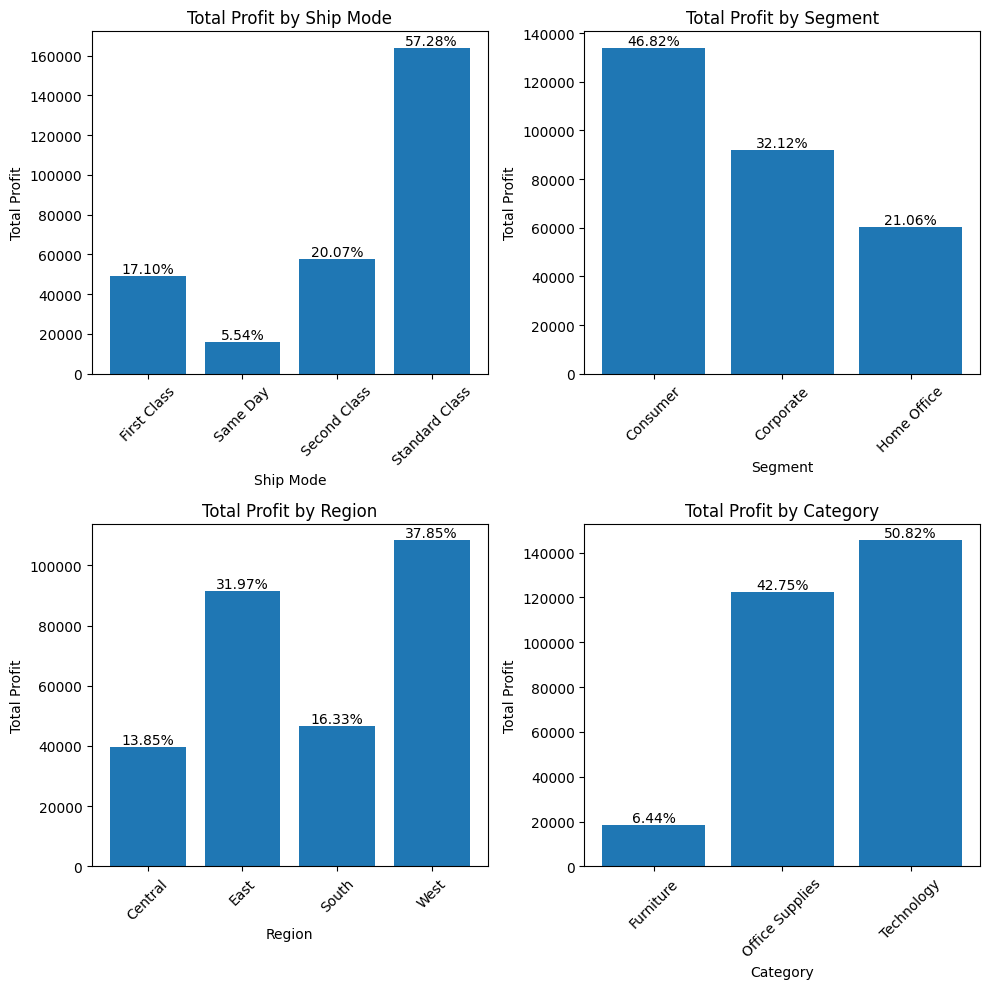

In [38]:
import math
i=0
fig,ax=plt.subplots(math.ceil(len((categorical_features))/2),2,figsize=(10,10))
ax = ax.ravel()

for feature in categorical_features:
    prof_summary = df.groupby(feature)['Profit'].agg(['mean','sum','count']).reset_index()
    bars=ax[i].bar(prof_summary[f'{feature}'],prof_summary['sum'])
    ax[i].set_xlabel(feature)
    ax[i].set_ylabel('Total Profit')
    ax[i].set_title(f'Total Profit by {feature}')
    ax[i].tick_params(axis='x',rotation=45)
    
    for bar in bars:
        ax[i].text(bar.get_x()+bar.get_width()/2,bar.get_height(),f'{(bar.get_height()/df.Profit.sum())*100:.2f}%',ha='center',va='bottom')
    i+=1

plt.tight_layout()
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 5.1 Feature matrix and target
X = df[['Sales', 'Discount', 'Quantity']]
y = df['Profit']

# 5.2 Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5.3 Train model
model = LinearRegression()
model.fit(X_train, y_train)

# 5.4 Evaluate
y_pred = model.predict(X_test)
print("R2:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

# 5.5 Inspect coefficients
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_
})
print(coef_df)

R2: 0.17412221963848062
RMSE: 62932.162945682256
    feature  coefficient
0     Sales     0.181498
1  Discount  -231.242863
2  Quantity    -3.071288
